In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
features=df.drop('ID#',axis=1)

In [5]:
features

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
from sklearn.preprocessing import normalize
features_norm=pd.DataFrame(normalize(features),columns=features.columns)
features_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [7]:
kmeans=KMeans(n_clusters=5)

In [8]:
clusters=kmeans.fit(features_norm)

C:\Users\Prathyusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
np.unique(clusters.labels_)

array([0, 1, 2, 3, 4])

In [10]:
df[clusters]=clusters.labels_

In [11]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans(n_clusters=5)
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [12]:
df[df[clusters]==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans(n_clusters=5)
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
10,11,40091,0,2,1,1,7278,10,0,0,6959,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3983,4006,26173,0,1,1,1,305,1,0,0,1418,0,0
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0


In [13]:
df[df[clusters]==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans(n_clusters=5)
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1
18,19,91473,0,3,1,1,27408,17,0,0,6903,1,1
19,20,23354,0,3,1,1,10447,5,0,0,6896,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,1
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,1
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1


In [14]:
df.isnull().sum()

ID#                     0
Balance                 0
Qual_miles              0
cc1_miles               0
cc2_miles               0
cc3_miles               0
Bonus_miles             0
Bonus_trans             0
Flight_miles_12mo       0
Flight_trans_12         0
Days_since_enroll       0
Award?                  0
KMeans(n_clusters=5)    0
dtype: int64

## Kmeans

In [15]:
inertia=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(features_norm)
    inertia.append(kmeans.inertia_)

C:\Users\Prathyusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Prathyusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Prathyusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Prathyusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

In [16]:
inertia

[484.85112913072527,
 267.59741095991853,
 173.2702562551141,
 116.32481600680406,
 90.82514805403544,
 70.47341595863996,
 60.07443540757991,
 51.93118666279238,
 47.188166341280294,
 42.86979140564725]

Text(0, 0.5, 'Inertia')

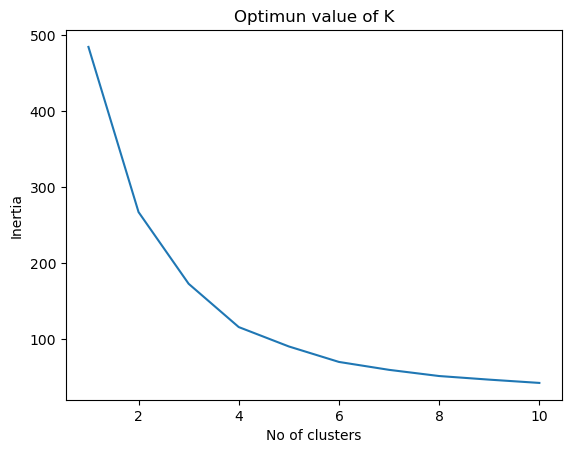

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),inertia)
plt.title('Optimun value of K')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')

## Hierarchy

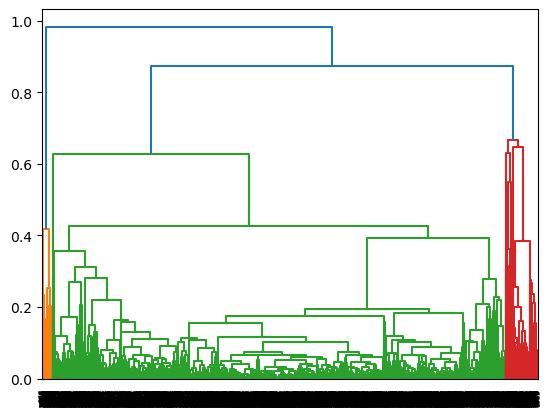

In [18]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(features_norm,'average'))

### DBSCAN

In [21]:
from sklearn.cluster import DBSCAN

In [23]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans(n_clusters=5)
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [24]:
a=df.values
a

array([[    1, 28143,     0, ...,  7000,     0,     0],
       [    2, 19244,     0, ...,  6968,     0,     2],
       [    3, 41354,     0, ...,  7034,     0,     0],
       ...,
       [ 4019, 73597,     0, ...,  1402,     1,     1],
       [ 4020, 54899,     0, ...,  1401,     0,     0],
       [ 4021,  3016,     0, ...,  1398,     0,     2]], dtype=int64)

In [25]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(a)
X1 = stscaler.transform(a)

In [26]:
dbscan = DBSCAN(eps=0.82, min_samples=6)
dbscan.fit(X1)

DBSCAN(eps=0.82, min_samples=6)

In [27]:
dbscan.labels_

array([0, 1, 0, ..., 5, 0, 1], dtype=int64)

In [28]:
cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [29]:
airlines = pd.concat([df,cl],axis=1)
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans(n_clusters=5),Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,5
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,6
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,5
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [30]:
airlines['Cluster'].value_counts()

 0     1351
-1     1033
 8      371
 1      309
 5      258
 6      256
 4      144
 7       83
 2       56
 3       37
 9       20
 12      17
 10      13
 14      13
 17      12
 13       8
 15       7
 16       6
 11       5
Name: Cluster, dtype: int64